In [4]:
import numpy as np
import matplotlib
from pylab import plt
import seaborn as sns

In [10]:
matplotlib.rcParams['figure.figsize'] = (8,5.5)
matplotlib.rcParams['figure.dpi']  =300

## Dependance and Independance

Roughly speaking, we say that two events $E$ and $F$ are dependent if knowing something about whether $E$ happens gives us information about whether $F$ happens (and vice versa). Otherwise, they are independent.


Mathematically, we say that two events E and F are independent if the probability that they both happen is the product of the probabilities that each one happens:
$$P(E,F) = P(E)P(F)$$

### Conditional Probability

Given the one of kids is a girl. Calculate the further probabilities

In [3]:
import enum, random
# an enum is a typed set of enumerated values

class Kid(enum.Enum):
    Boy = 0
    Girl = 1
    
def random_kid():
    return random.choice([Kid.Boy, Kid.Girl])
    
both_girl = 0
older_girl = 0
either_girl = 0
    
# random.seed(0)          #fixing this random return
    
    
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
        
    if older == Kid.Girl:
        older_girl += 1
    if older == Kid.Girl and younger == Kid.Girl:
        both_girl += 1
    if older == Kid.Girl or younger == Kid.Girl:
        either_girl += 1
        
print("P(both | older):" , both_girl/older_girl)
print("P(both | either):", both_girl/either_girl)

P(both | older): 0.497624703087886
P(both | either): 0.3345754591429332


<font color = 'orange'> Goes with our intuition of that tricky question where we have to find what is probability child is boy

# <font color = 'aqua'>Bayes' Theorem

Method of reversing condition probability

Let’s say we need to know the probability of some event E conditional on some other event F occurring. But we only have information about the probability of F conditional on E occurring. Using the definition of conditional probability twice tells us that:
$$P(E|F) = P(E,F)/P(F) = P(F|E)P(E)/P(F)$$

## <font color = 'aqua'>Random Variable
A random variable is a variable whose possible values have an associated probability distribution. A very simple random variable equals 1 if a coin flip turns up heads and 0 if the flip turns up tails

In [12]:
def uniform_cdf(x: float) -> float:
    """Returns the probability that a uniform random variable is <= x"""
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X <= 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

In [13]:
uniform_cdf(0.4)

0.4

## <font color = 'aqua'>Normal Distribution

$$ f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}\exp{\big( - \frac{(x-\mu)^2}{2 \sigma ^2} \big)}$$

where $\mu$ is mean and $\sigma$ represents standard deviation

In [14]:
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

normal_pdf(x = 0.5)

0.3520653267642995

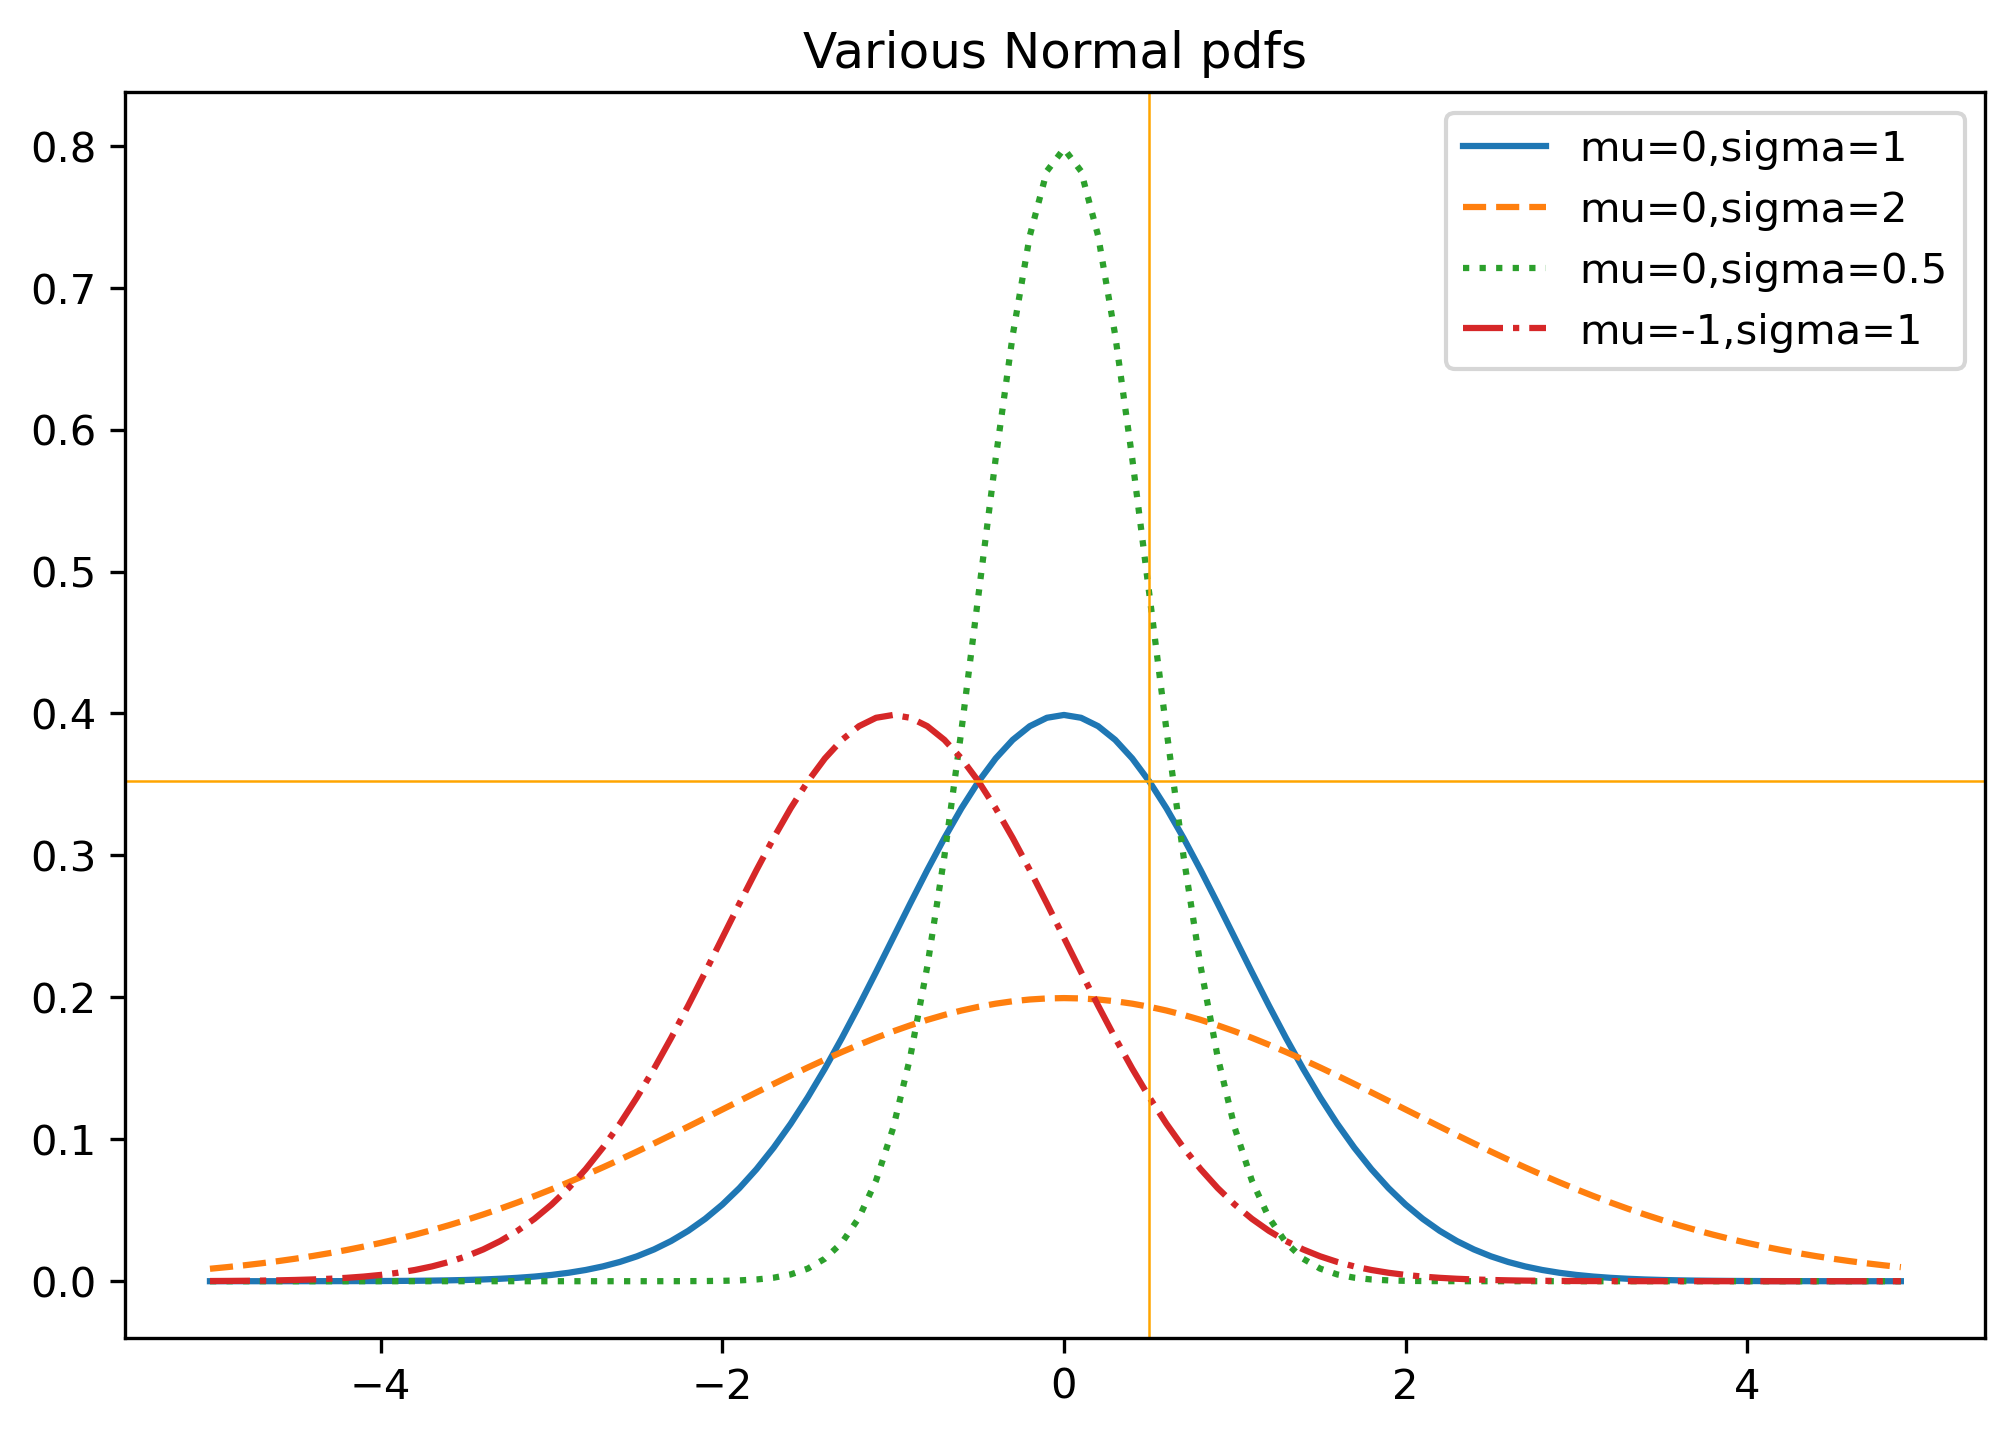

In [23]:
import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')

plt.axhline(normal_pdf(x = 0.5), color = 'orange', lw = 0.6)
plt.axvline(0.5,color = 'orange', lw = 0.6)

plt.legend()
plt.title("Various Normal pdfs")
plt.show()

#### And indeed for x = 0.5, our values is what we calculated above

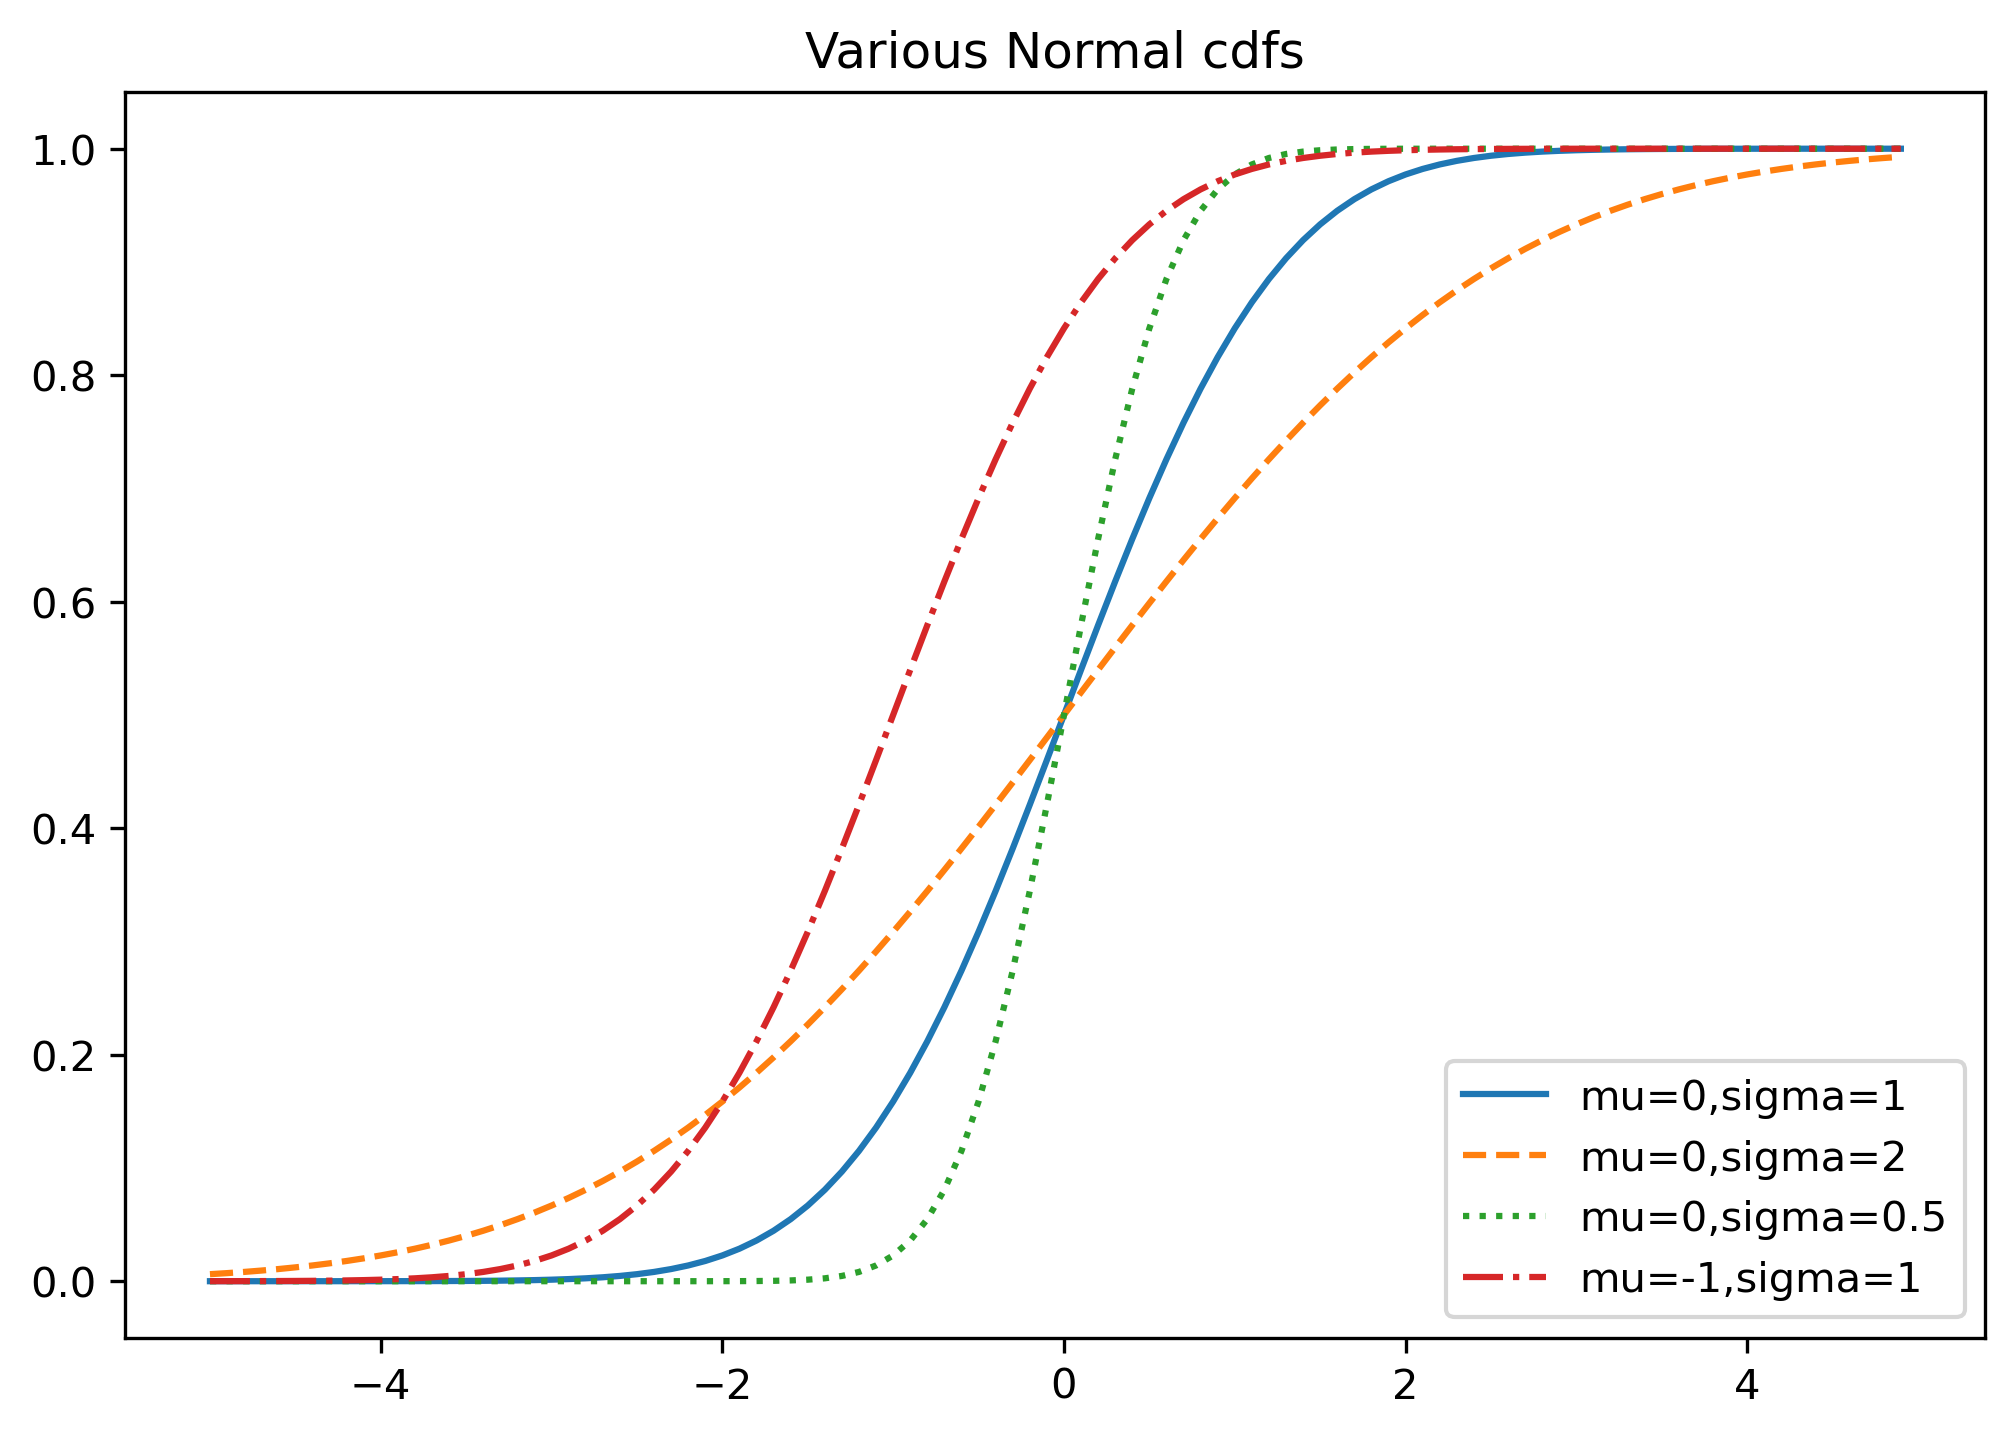

In [45]:
import matplotlib.pyplot as plt
import math

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

When $\mu = 0$ and $\sigma = 1$, it’s called the **standard normal distribution**. If Z is a standard normal random variable, then it turns out that:
$$ X = \sigma Z + \mu$$
is also normal but with mean and standard deviation . Conversely, if X is a normal random variable with mean and standard deviation ,
$$ Z = (X - \mu)/\sigma $$
is called **standard normal variable**

We shall often invert `normal_cdfs` to find the associated probability. Since, it is strictly increasing , we can use the `binary_search`

In [46]:
def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z


inverse_normal_cdf(p = 0.4)

-0.2533435821533203

The function repeatedly bisects intervals until it narrows in on a Z that’s close enough to the desired probability.

# Central Limit Theorem
One reason the normal distribution is so useful is the central limit theorem, which says (in essence) that a random variable defined as the average of a large number of independent and identically distributed random variables is itself approximately normally distributed.

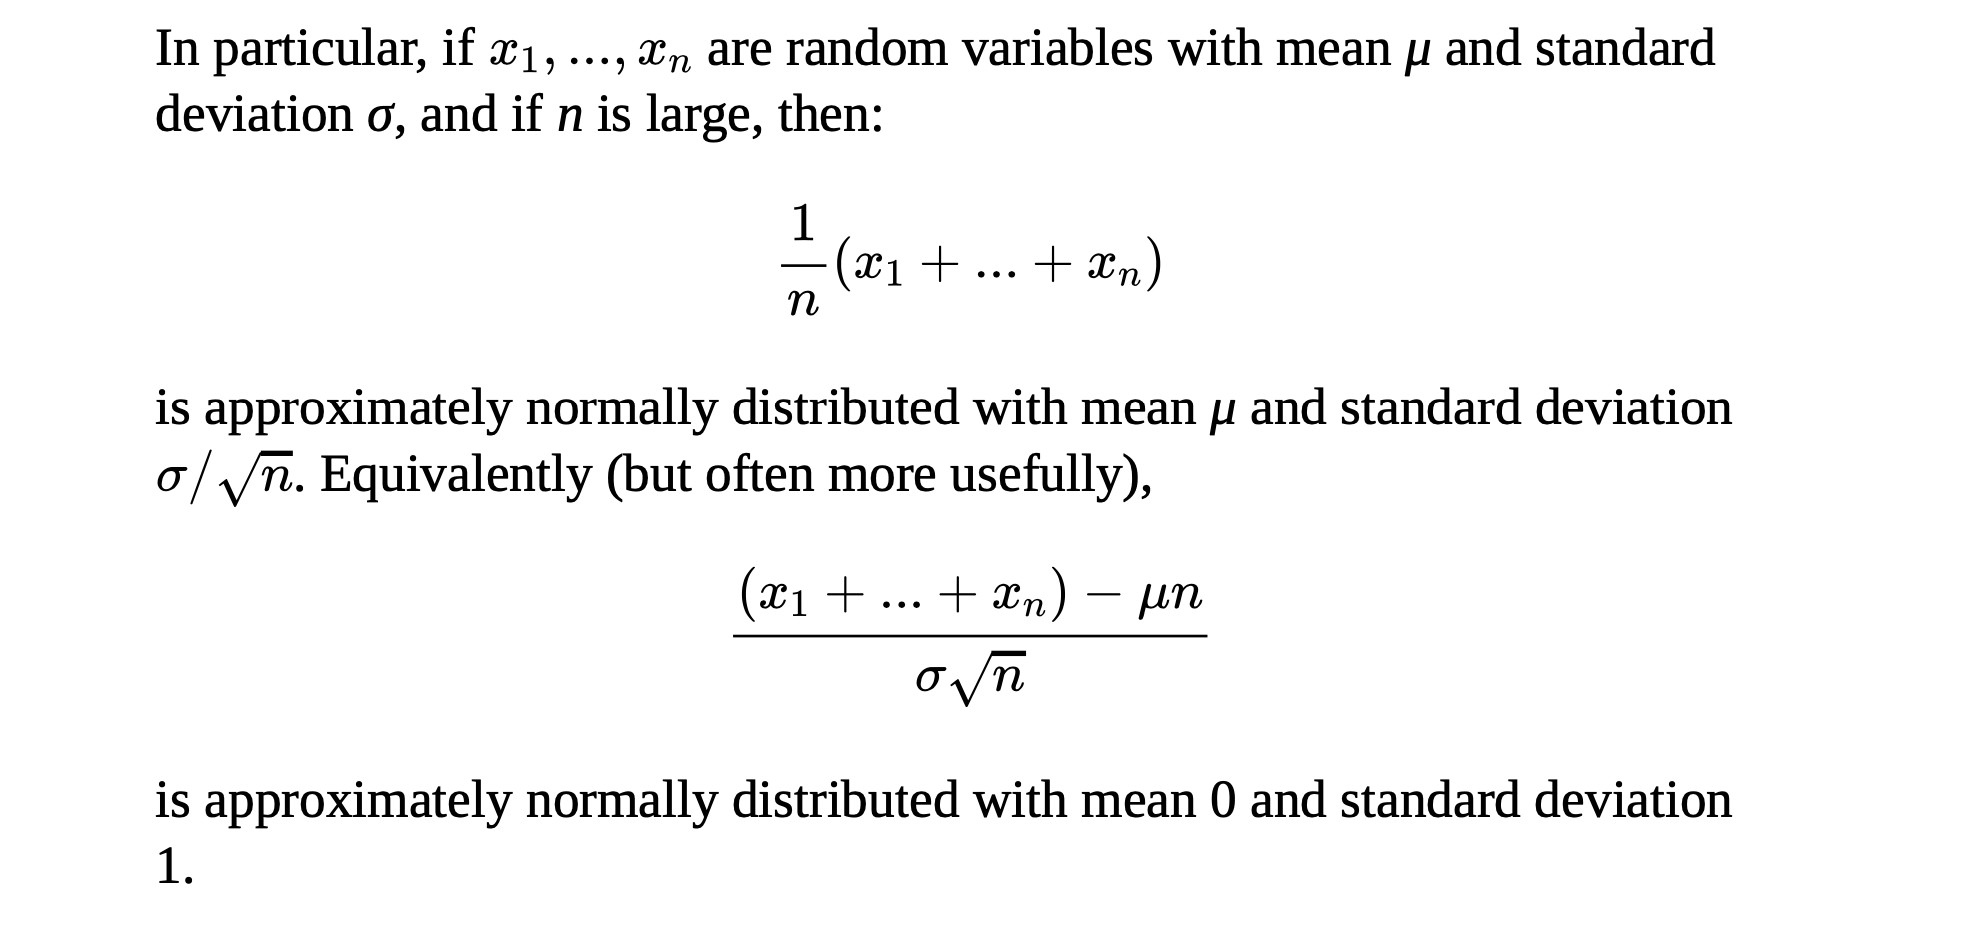

A Binomial $(n,p)$ random variable is simply the sum of n independent Bernoulli(p) random variables, each of which equals 1 with probability p and 0 with probability 1 – p:

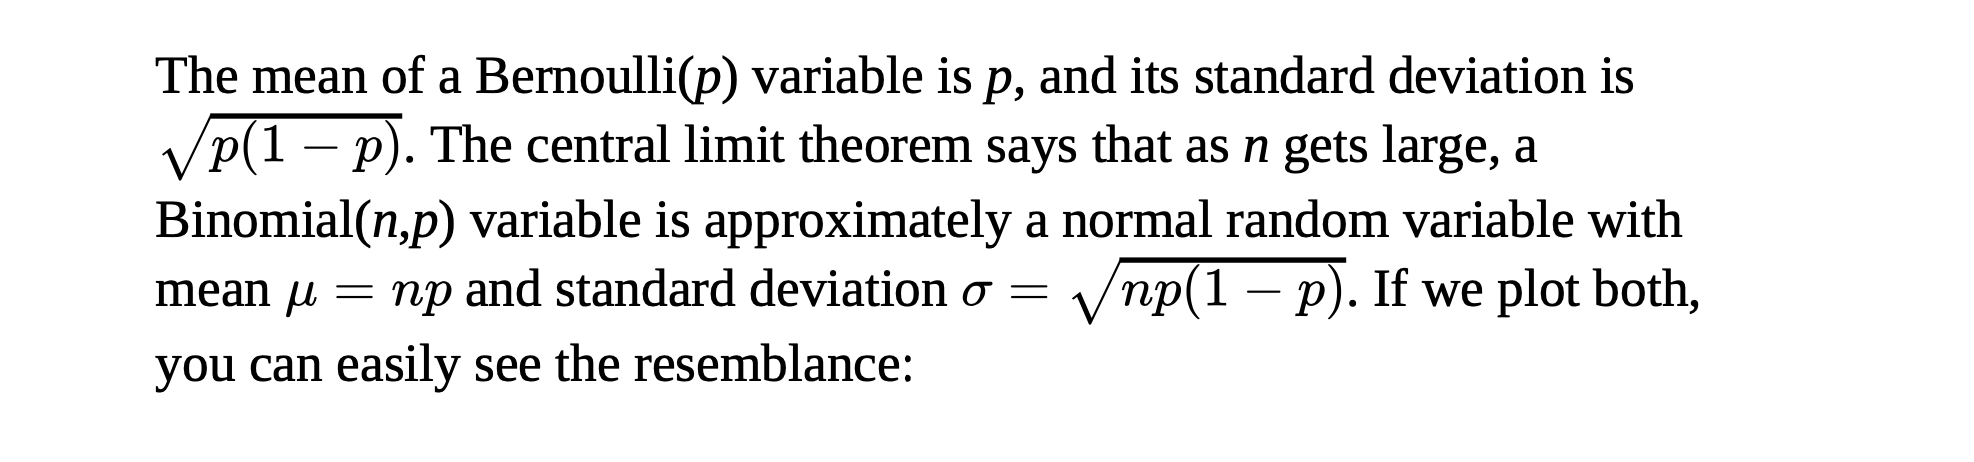

In [47]:
import random


def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))


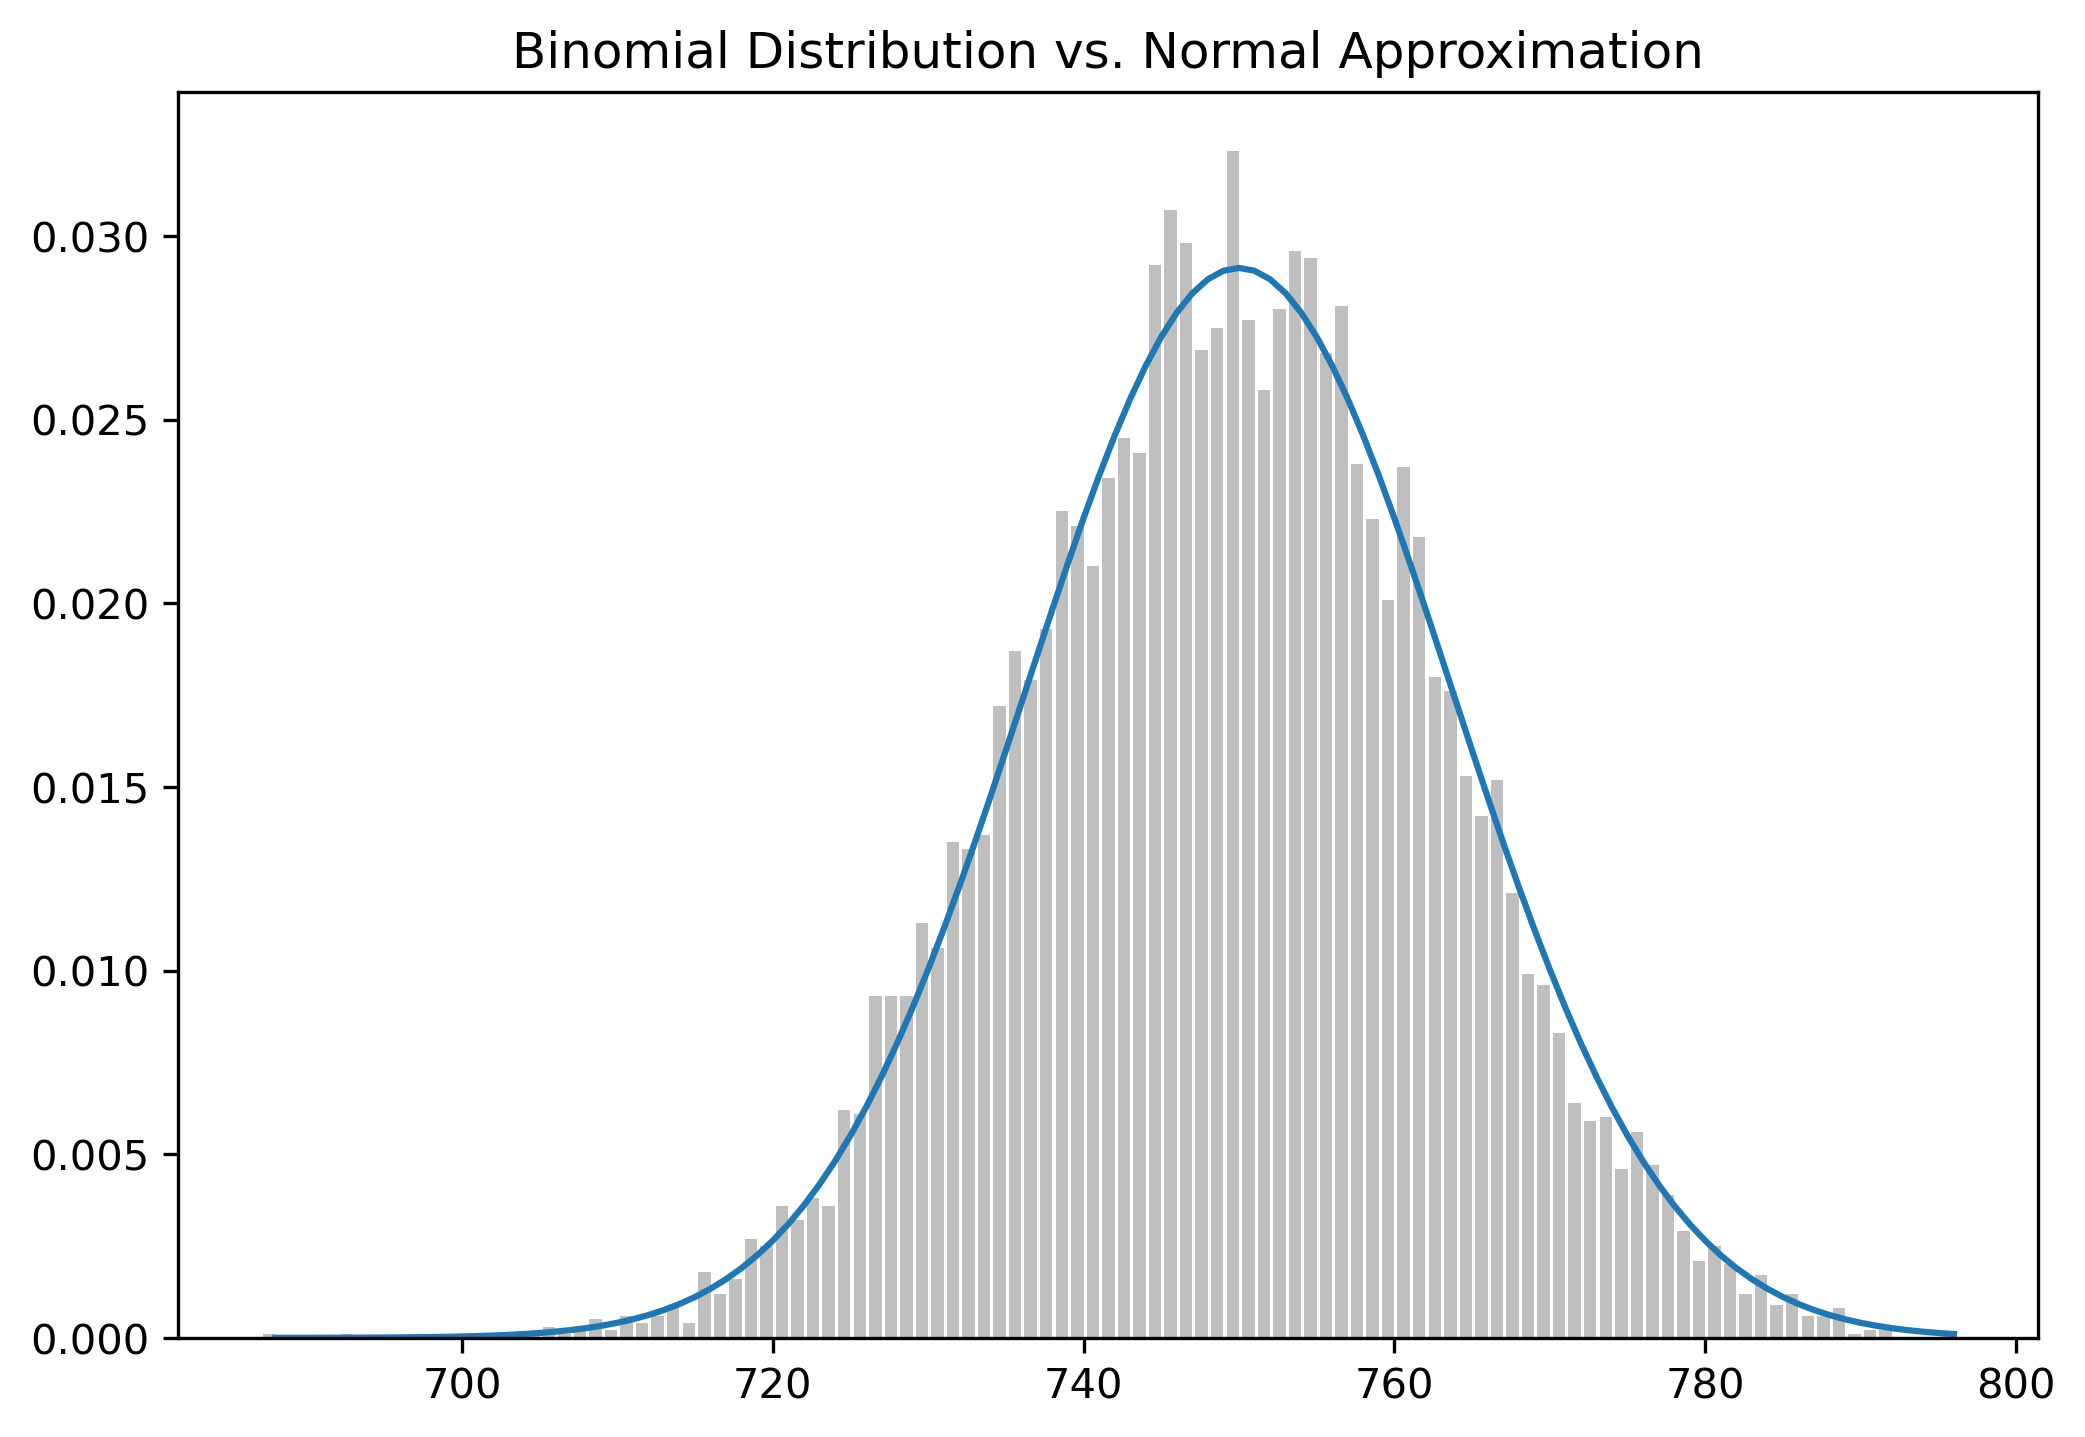

In [51]:

from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Picks points from a Binomial(n, p) and plots their histogram"""
    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
#     plt.bar(x, height, width, bottom, align) -syntax of plt.bar

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

binomial_histogram(p=0.75, n = 1000, num_points=10000)

## <font color = 'aqua'> Bayesian Inference

In [52]:
import math

In [59]:
from IPython.display import Image
Image(url='https://www.thoughtco.com/thmb/_DuhuwNX9EebL4ZHxDCA1QdyLUk=/799x202/filters:fill(auto,1)/Gamma-56a8fa853df78cf772a26da7.jpg', retina=True)

In [57]:
math.gamma(10)

362880.0